## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [51]:
# importing necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# ignoring warnings to keep the output clean
warnings.filterwarnings("ignore")

# enabling inline plotting for matplotlib
%matplotlib inline

In [52]:
# loading the dataset into a pandas DataFrame
df = pd.read_csv("Travel.csv")
# displaying the first 10 rows of the DataFrame to get an initial look at the data
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


## DATA CLEANING
###  1. Handling Missing values
#####  2. Handling Duplicates
#####  3. Check data type
#####  4. Understand the dataset

In [53]:
# checking for missing values in each column
# this helps identify which columns require imputation or removal
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [54]:
# checking the unique values and their counts in the 'Gender' column
# this helps identify inconsistencies or variations in categorical entries
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [55]:
# checking the unique values and their counts in the 'MaritalStatus' column
# this helps identify inconsistencies or variations in categorical entries
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [56]:
# checking the unique values and their counts in the 'TypeofContact' column
# this helps identify inconsistencies or variations in categorical entries
df['TypeofContact'].value_counts()

,count
TypeofContact,
Self Enquiry,3444
Company Invited,1419


In [57]:
# replacing inconsistent values in the 'Gender' column with a consistent value ('Female')
df["Gender"] = df["Gender"].replace("Fe Male","Female")
# replacing an inconsistent value in the 'MaritalStatus' column ('Single') with another ('Unmaried')
df['MaritalStatus'] = df["MaritalStatus"].replace('Single','Unmaried')

In [58]:
# re-checking the unique values and their counts in the 'Gender' column after replacement
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1972


In [59]:
# re-checking the unique values and their counts in the 'MaritalStatus' column after replacement
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Unmaried,916
Unmarried,682


In [60]:
# replacing another inconsistent value in the 'MaritalStatus' column ('Unmaried') with a consistent value ('Unmarried')
df["MaritalStatus"] = df["MaritalStatus"].replace("Unmaried","Unmarried")

In [61]:
# re-checking the unique values and their counts in the 'MaritalStatus' column after replacement
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Unmarried,1598
Divorced,950


In [62]:
# displaying the first few rows of the DataFrame after handling some categorical inconsistencies
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### checking Missing values
### these are the features with nan value


In [63]:
# identifying features with missing values
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
# printing the count of missing values for each identified feature
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull()).sum() )

Age 226
TypeofContact 25
DurationOfPitch 251
NumberOfFollowups 45
PreferredPropertyStar 26
NumberOfTrips 140
NumberOfChildrenVisiting 66
MonthlyIncome 233


In [64]:
# generating descriptive statistics for numerical features that have missing values
# this helps understand the distribution and central tendencies of these features before imputation
df[features_with_na].select_dtypes(exclude = 'object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


# Imputing Null Values


In [65]:
# imputing missing values in 'Age' with the median of the column
df["Age"].fillna(df["Age"].median(), inplace=True)

# imputing missing values in 'TypeofContact' with the mode (most frequent value)
df["TypeofContact"].fillna(df["TypeofContact"].mode()[0], inplace=True)

# imputing missing values in 'DurationOfPitch' with the median
df["DurationOfPitch"].fillna(df["DurationOfPitch"].median(), inplace=True)

# imputing missing values in 'NumberOfFollowups' with the mode
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0], inplace=True)

# imputing missing values in 'PreferredPropertyStar' with the mode
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0], inplace=True)

# imputing missing values in 'NumberOfTrips' with the median
df["NumberOfTrips"].fillna(df["NumberOfTrips"].median(), inplace=True)

# imputing missing values in 'NumberOfChildrenVisiting' with the mode
df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0], inplace=True)

# imputing missing values in 'MonthlyIncome' with the median
df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(), inplace=True)

In [66]:
# re-checking for missing values after imputation to confirm that all nulls have been handled
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [67]:
# displaying the first few rows of the DataFrame after imputing missing values
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [68]:
# dropping the 'CustomerID' column as it is likely not relevant for the prediction task
df.drop('CustomerID',inplace = True,axis =1)

In [69]:
# displaying the first few rows of the DataFrame after dropping the 'CustomerID' column
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Feature Engineering
## Feature Extraction

In [70]:
# creating a new feature 'TotalVisiting' by summing 'NumberOfPersonVisiting' and 'NumberOfChildrenVisiting'
# this new feature might represent the total number of people in the customer's group
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
# dropping the original 'NumberOfPersonVisiting' and 'NumberOfChildrenVisiting' columns
# this is done to avoid multicollinearity and use the combined information in 'TotalVisiting'
df.drop(columns = ['NumberOfPersonVisiting','NumberOfChildrenVisiting'])

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Unmarried,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Unmarried,3.0,0,5,0,Executive,20289.0,5.0


In [71]:
# identifying numerical features in the DataFrame
num_features = [feature for feature in df.columns if df[feature].dtype !='O']
# printing the count of numerical features
print("Num of Numerical features",len(num_features))

Num of Numerical features 14


In [72]:
# identifying categorical features in the DataFrame
cat_features = [feature for feature in df.columns if df[feature].dtype =='O']
# printing the count of categorical features
print("Num of Numerical features",len(cat_features))

Num of Numerical features 6


In [73]:
# displaying the first few rows of the DataFrame after feature engineering
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [74]:
# identifying discrete numerical features (features with a limited number of unique values)
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
# printing the count of discrete numerical features
len(discrete_features)

11

In [75]:
##identifying continuous numerical features
continous_features = [feature for feature in num_features if feature not in discrete_features]
# printing the count of continuous numerical features
len(continous_features)

3

# Train_Test Split and Model Training

In [76]:
# splitting the data into features (X) and the target variable (y)
X = df.drop(['ProdTaken'],axis = 1 )
y = df['ProdTaken']

In [77]:
# displaying the features DataFrame (X)
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0,5.0


In [78]:
# checking the distribution of the target variable 'ProdTaken'
# this helps understand if the dataset is balanced or imbalanced
y.value_counts()

,count
ProdTaken,
0,3968
1,920


In [81]:
from sklearn.model_selection import train_test_split
# splitting the data into training and testing sets
# test_size=0.25 means 25% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [82]:
# displaying the training features set
X_train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
4128,31.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Basic,5.0,Unmarried,7.0,1,4,0,1.0,Executive,21335.0,4.0
1157,36.0,Company Invited,1,14.0,Salaried,Female,2,3.0,Deluxe,3.0,Married,2.0,0,5,1,1.0,Manager,22347.0,3.0
744,37.0,Self Enquiry,1,13.0,Small Business,Female,3,5.0,Deluxe,4.0,Divorced,6.0,0,4,1,0.0,Manager,19777.0,3.0
4753,43.0,Self Enquiry,3,11.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,2.0,0,5,1,1.0,Manager,23833.0,4.0
2312,28.0,Self Enquiry,1,18.0,Salaried,Female,3,3.0,Basic,3.0,Married,2.0,1,4,1,1.0,Executive,17515.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Unmarried,2.0,0,1,1,2.0,Executive,20723.0,5.0
466,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,4.0
3092,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,5.0
3772,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,5.0


In [83]:
# checking the shape of the testing features set
X_test.shape

(1222, 19)

In [84]:
# checking the shape of the training target variable set
y_train.shape

(3666,)

In [85]:
# separating the column names for categorical and numerical features for preprocessing
cat_features = X.select_dtypes(include = 'object').columns
num_featuress = X.select_dtypes(exclude = 'object').columns

In [86]:
# displaying the list of categorical feature names
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [87]:
# displaying the list of numerical feature names
num_featuress

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

In [88]:
# importing necessary libraries for preprocessing
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer

# creating a StandardScaler object to standardize numerical features
numeric_transformer =StandardScaler()
# creating a OneHotEncoder object to convert categorical features into numerical format
# drop='first' avoids multicollinearity by dropping one category from each feature
ohe_transformer =OneHotEncoder(drop ='first')

In [89]:
# creating a ColumnTransformer to apply different transformations to different columns
# 'OneHotEncoder' is applied to categorical features and 'StandardScaler' to numerical features
prepro = ColumnTransformer(
    [
        ("OneHotEncoder",ohe_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_featuress)
    ]
)

In [90]:
# displaying the ColumnTransformer object to show the defined transformations
prepro

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [91]:
# applying the defined preprocessing steps (OneHotEncoding and StandardScaler) to the training data
# fit_transform learns the scaling parameters and categories from the training data and then transforms it
X_train = prepro.fit_transform(X_train)

In [92]:
# converting the transformed training data into a pandas DataFrame for better readability
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.135533,0.277912,1.777611,2.053422,1.575272,0.681958,-1.273702,-0.212190,-0.415942,-0.058810
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-1.248489,-0.723883,-0.724971,-0.670111,-0.634811,1.409353,0.785113,-0.212190,-0.224146,-0.768009
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.135533,1.279708,0.526320,1.508716,-0.634811,0.681958,0.785113,-1.385473,-0.711215,-0.768009
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.135533,0.277912,1.777611,-0.670111,-0.634811,1.409353,0.785113,-0.212190,0.057482,-0.058810
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.135533,-0.723883,-0.724971,-0.670111,1.575272,0.681958,0.785113,-0.212190,-1.139911,-0.058810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.135533,1.279708,-0.724971,-0.670111,-0.634811,-1.500228,0.785113,0.961094,-0.531928,0.650390
3662,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.135533,-0.723883,1.777611,-1.214818,-0.634811,1.409353,0.785113,-0.212190,1.528543,-0.058810
3663,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.135533,0.277912,-0.724971,2.053422,-0.634811,-0.772833,0.785113,0.961094,-0.356053,0.650390
3664,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.135533,1.279708,-0.724971,-0.125404,-0.634811,-1.500228,0.785113,0.961094,-0.248595,0.650390


In [93]:
# applying the defined preprocessing steps (OneHotEncoding and StandardScaler) to the testing data
# transform uses the scaling parameters and categories learned from the training data to transform the test data
X_test = prepro.transform(X_test)

In [94]:
# converting the transformed testing data into a pandas DataFrame for better readability
pd.DataFrame(X_test )

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-1.248489,1.279708,-0.724971,-1.214818,-0.634811,-0.772833,-1.273702,-0.212190,-0.731873,-0.768009
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.135533,0.277912,0.526320,-1.214818,1.575272,1.409353,-1.273702,-0.212190,-0.664972,-0.058810
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.135533,0.277912,-0.724971,0.964009,-0.634811,1.409353,0.785113,-1.385473,-0.416131,-0.768009
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.135533,2.281503,-0.724971,1.508716,-0.634811,-0.045437,0.785113,0.961094,-0.109865,0.650390
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.519555,0.277912,0.526320,-0.125404,1.575272,0.681958,0.785113,2.134377,-0.312653,2.068789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.135533,0.277912,1.777611,-0.125404,1.575272,-0.045437,0.785113,0.961094,2.315245,0.650390
1218,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.248489,-0.723883,-0.724971,0.419302,-0.634811,0.681958,0.785113,-0.212190,1.728488,-0.768009
1219,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.248489,0.277912,-0.724971,-1.214818,-0.634811,-0.772833,0.785113,-0.212190,-0.224146,-0.768009
1220,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.519555,-1.725679,0.526320,-0.125404,-0.634811,-1.500228,0.785113,0.961094,-0.535150,1.359589


In [95]:
# importing necessary libraries for model training and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_curve,auc


##############################
 Training Random Forest
##############################
--- Random Forest Train Performance ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       697

    accuracy                           1.00      3666
   macro avg       1.00      1.00      1.00      3666
weighted avg       1.00      1.00      1.00      3666



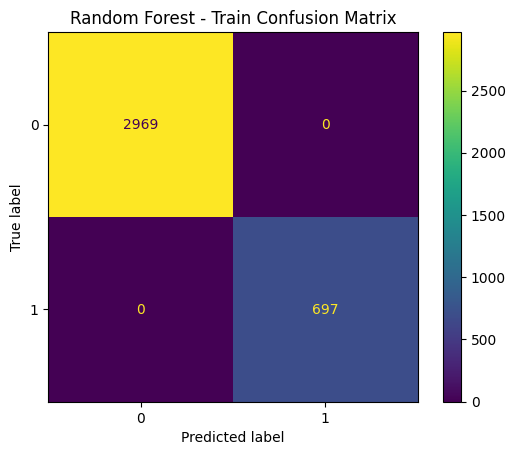

--- Random Forest Test Performance ---
Accuracy: 0.9189852700490998
Precision: 0.9208164765584045
Recall: 0.9189852700490998
F1 Score: 0.9113388783862267
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       999
           1       0.94      0.59      0.73       223

    accuracy                           0.92      1222
   macro avg       0.93      0.79      0.84      1222
weighted avg       0.92      0.92      0.91      1222



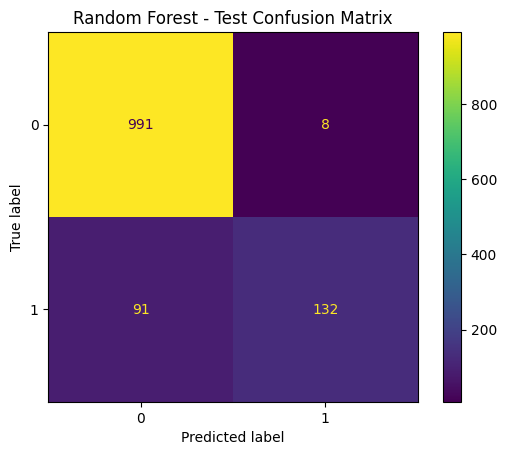

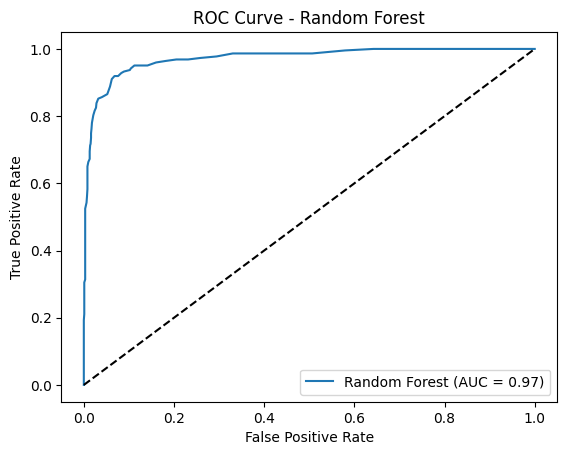


##############################
 Training Logistic Regression
##############################
--- Logistic Regression Train Performance ---
Accuracy: 0.8420621931260229
Precision: 0.8249136417284102
Recall: 0.8420621931260229
F1 Score: 0.8155660045446484
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2969
           1       0.70      0.30      0.42       697

    accuracy                           0.84      3666
   macro avg       0.78      0.63      0.66      3666
weighted avg       0.82      0.84      0.82      3666



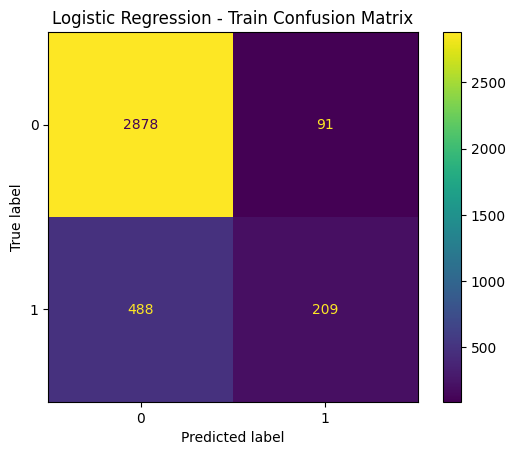

--- Logistic Regression Test Performance ---
Accuracy: 0.8453355155482815
Precision: 0.8259768364129305
Recall: 0.8453355155482815
F1 Score: 0.8215401717296671
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       999
           1       0.66      0.31      0.42       223

    accuracy                           0.85      1222
   macro avg       0.76      0.64      0.67      1222
weighted avg       0.83      0.85      0.82      1222



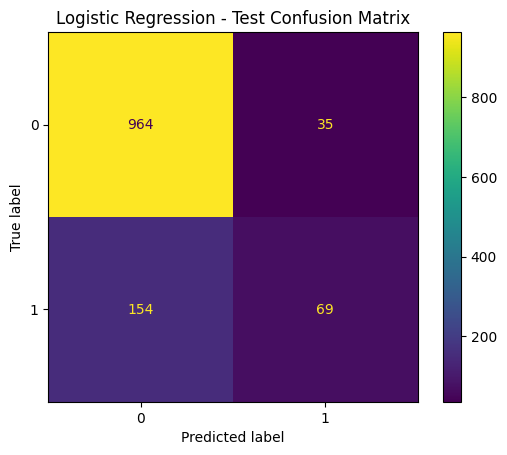

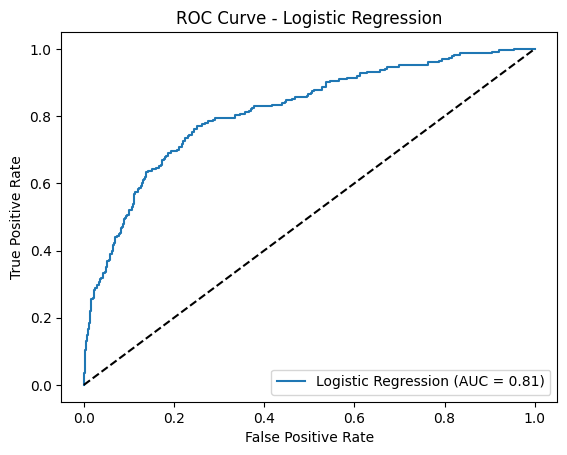


##############################
 Training SVM
##############################
--- SVM Train Performance ---
Accuracy: 0.8900709219858156
Precision: 0.8916938495696419
Recall: 0.8900709219858156
F1 Score: 0.8756189478360242
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      2969
           1       0.91      0.47      0.62       697

    accuracy                           0.89      3666
   macro avg       0.90      0.73      0.78      3666
weighted avg       0.89      0.89      0.88      3666



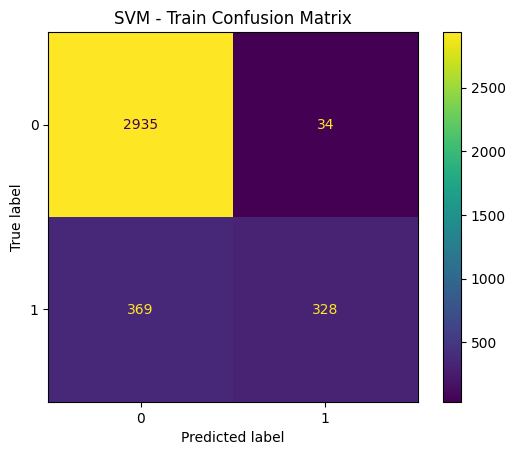

--- SVM Test Performance ---
Accuracy: 0.8657937806873978
Precision: 0.859516730548148
Recall: 0.8657937806873978
F1 Score: 0.8428237983053003
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       999
           1       0.81      0.35      0.48       223

    accuracy                           0.87      1222
   macro avg       0.84      0.66      0.70      1222
weighted avg       0.86      0.87      0.84      1222



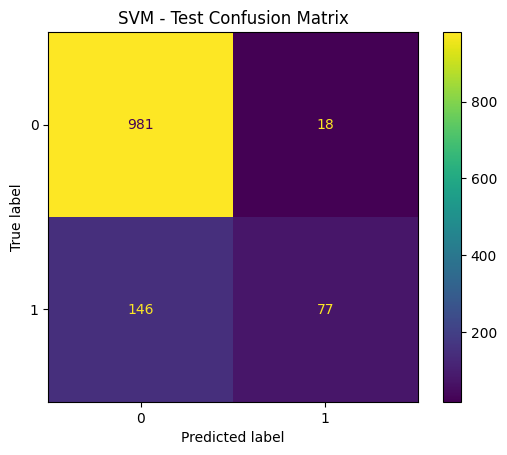

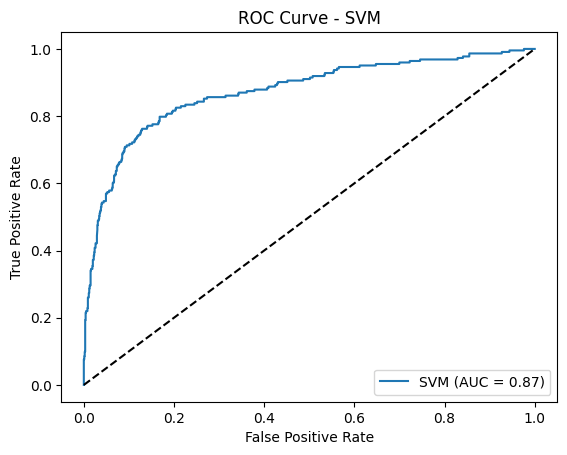

In [96]:
# defining a dictionary of models to be trained and evaluated
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# iterating through each model in the dictionary
for name, model in models.items():
    print(f"\n{'#'*30}\n Training {name}\n{'#'*30}")

    # training the model on the preprocessed training data
    model.fit(X_train, y_train)

    # making predictions on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # printing and visualizing evaluation metrics for the training set
    print(f"--- {name} Train Performance ---")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
    print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
    print("F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    # displaying the confusion matrix for the training set
    ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
    plt.title(f"{name} - Train Confusion Matrix")
    plt.show()

    # printing and visualizing evaluation metrics for the testing set
    print(f"--- {name} Test Performance ---")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    # displaying the confusion matrix for the testing set
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    plt.title(f"{name} - Test Confusion Matrix")
    plt.show()

    # plotting the ROC curve for binary classification models
    if len(set(y_test)) == 2:
        # getting the predicted probabilities for the positive class
        y_test_proba = model.predict_proba(X_test)[:,1]
        # calculating the false positive rate, true positive rate, and thresholds for the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_test_proba)
        # calculating the Area Under the ROC Curve (AUC)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        # plotting the ROC curve
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        # plotting the diagonal line representing random chance
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()

In [97]:
## defining the hyperparameter grid for RandomizedSearchCV for the Random Forest model
rf_params = {
    "max_depth" : [5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [98]:
# creating a list of tuples, where each tuple contains the model name, the model object, and its hyperparameter grid
randomcv_models = [
    ("RF",RandomForestClassifier(),rf_params),
     ]

In [99]:
# displaying the list of models and their parameter grids for RandomizedSearchCV
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

##HYPERPARAMETER TUNNING USING RANDOMSEARCHCV

In [100]:
# importing RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# initializing a dictionary to store the best hyperparameters for each model
model_param = {}

# iterating through each model and its parameter grid
# randomcv_models should look like: [(name, model, param_grid), ...]
for name, model, params in randomcv_models:
    # creating a RandomizedSearchCV object
    # estimator: the model to tune
    # param_distributions: the hyperparameter grid
    # n_iter: the number of parameter settings that are sampled
    # cv: the number of folds for cross-validation
    # verbose: controls the verbosity: 2 means print score and parameters for each fold
    # n_jobs: number of jobs to run in parallel (-1 means use all available processors)
    random = RandomizedSearchCV(
        estimator = model,
        param_distributions = params,   # use params from tuple, not rf_params
        n_iter = 100,
        cv = 3,
        verbose = 2,
        n_jobs = -1
    )
    # fitting RandomizedSearchCV to the training data to find the best hyperparameters
    random.fit(X_train, y_train)
    # storing the best hyperparameters found for the current model
    model_param[name] = random.best_params_

# printing the best hyperparameters found for each tuned model
for model_name in model_param:
    print(model_name)
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
RF
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}



##############################
 Training Random Forest
##############################
--- Random Forest Train Performance ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       697

    accuracy                           1.00      3666
   macro avg       1.00      1.00      1.00      3666
weighted avg       1.00      1.00      1.00      3666



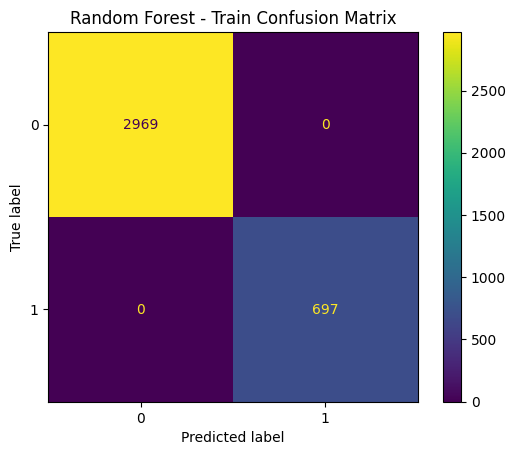

--- Random Forest Test Performance ---
Accuracy: 0.9312602291325696
Precision: 0.9319676332516348
Recall: 0.9312602291325696
F1 Score: 0.9263897597493526
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       999
           1       0.94      0.66      0.78       223

    accuracy                           0.93      1222
   macro avg       0.94      0.83      0.87      1222
weighted avg       0.93      0.93      0.93      1222



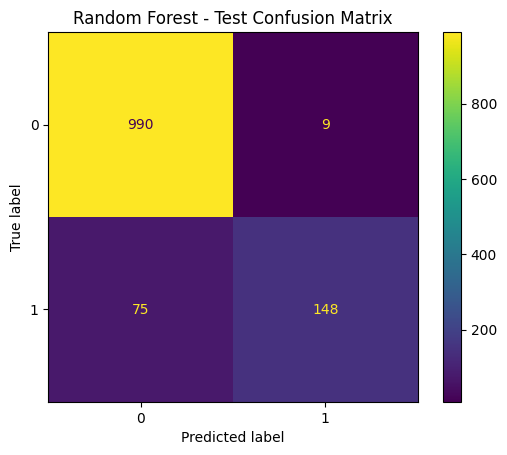

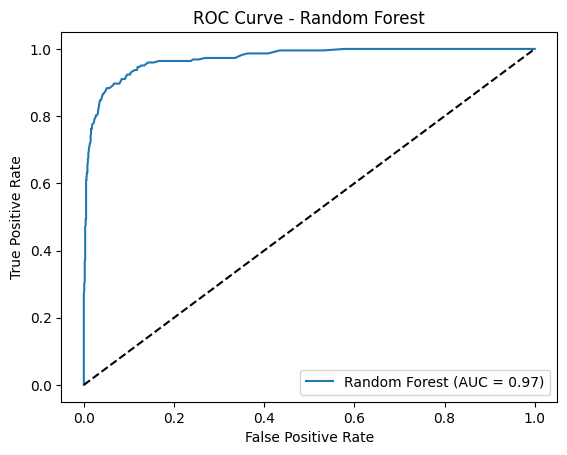

In [103]:
# defining a dictionary of models with their best hyperparameters found from RandomizedSearchCV
models = {
    "Random Forest": RandomForestClassifier(n_estimators= 200, min_samples_split= 2, max_features=8, max_depth= None),
}


# iterating through each model in the dictionary to train and evaluate them with the best hyperparameters
for name, model in models.items():
    print(f"\n{'#'*30}\n Training {name}\n{'#'*30}")

    # training the model on the preprocessed training data
    model.fit(X_train, y_train)

    # making predictions on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # printing and visualizing evaluation metrics for the training set
    print(f"--- {name} Train Performance ---")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
    print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
    print("F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    # displaying the confusion matrix for the training set
    ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
    plt.title(f"{name} - Train Confusion Matrix")
    plt.show()

    # printing and visualizing evaluation metrics for the testing set
    print(f"--- {name} Test Performance ---")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    # displaying the confusion matrix for the testing set
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    plt.title(f"{name} - Test Confusion Matrix")
    plt.show()

    # plotting the ROC curve for binary classification models
    if len(set(y_test)) == 2:
        # getting the predicted probabilities for the positive class
        y_test_proba = model.predict_proba(X_test)[:,1]
        # calculating the false positive rate, true positive rate, and thresholds for the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_test_proba)
        # calculating the Area Under the ROC Curve (AUC)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        # plotting the ROC curve
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        # plotting the diagonal line representing random chance
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()